### About
A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
house_data = pd.read_csv('Housing.csv')
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### EDA

In [3]:
house_data.shape

(545, 13)

In [4]:
house_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Check for missing data
house_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
house_data.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

#### Visualize relationships

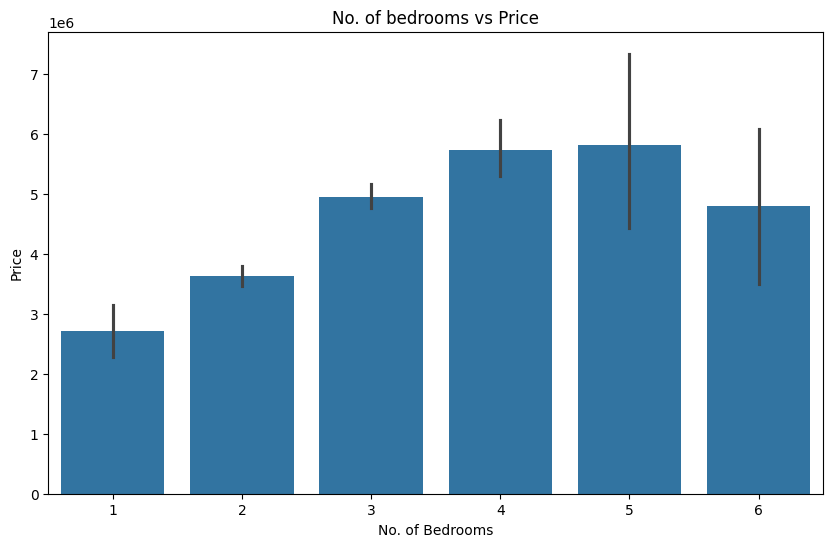

In [9]:
# No. of bedrooms vs price
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=house_data)
plt.title('No. of bedrooms vs Price')
plt.ylabel('Price')
plt.xlabel('No. of Bedrooms')
plt.show()

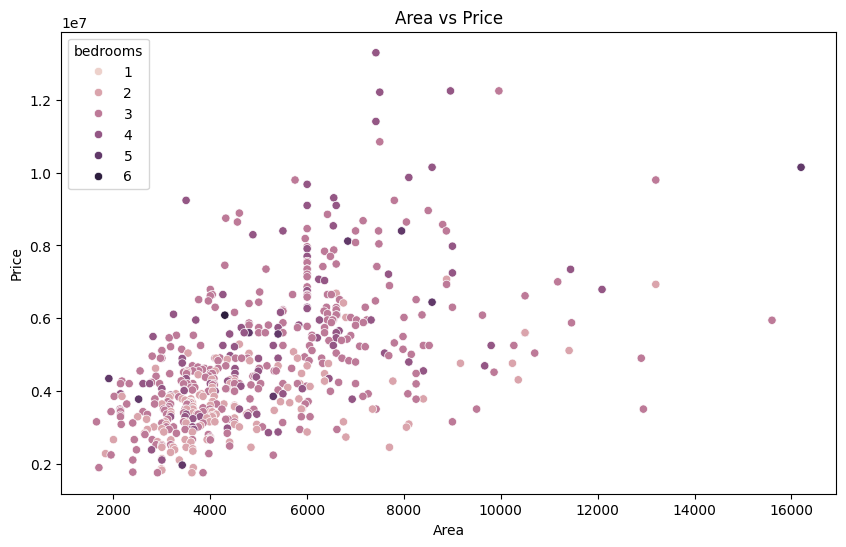

In [10]:
# Area vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=house_data, hue='bedrooms')
plt.title('Area vs Price')
plt.ylabel('Price')
plt.xlabel('Area')
plt.show()

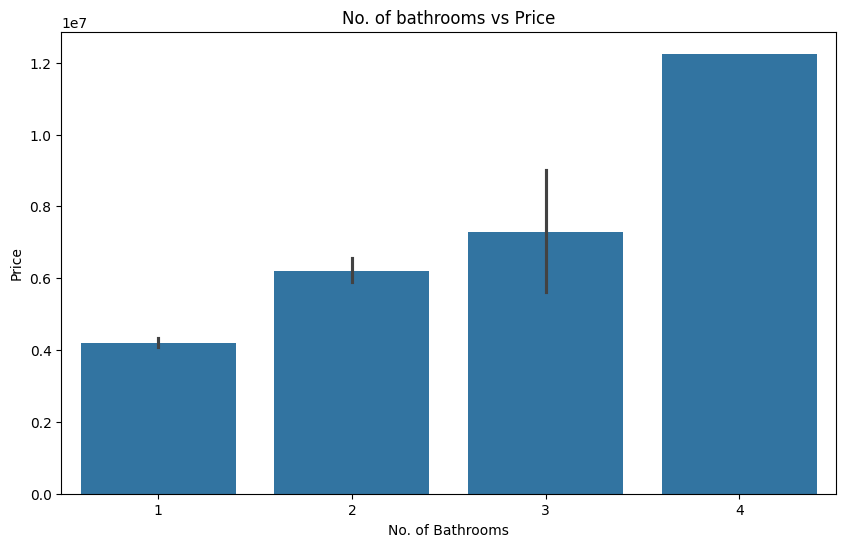

In [11]:
# No. of bathrooms vs price
plt.figure(figsize=(10, 6))
sns.barplot(x='bathrooms', y='price', data=house_data)
plt.title('No. of bathrooms vs Price')
plt.ylabel('Price')
plt.xlabel('No. of Bathrooms')
plt.show()

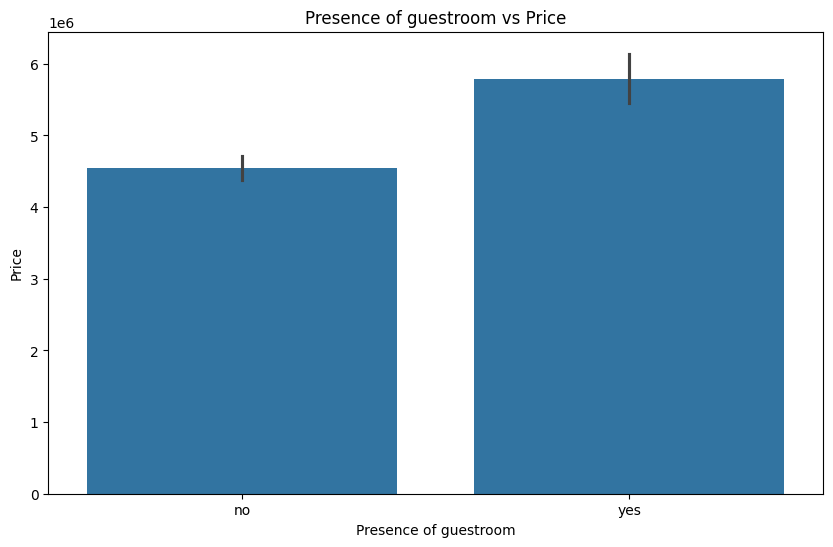

In [12]:
# Presence of guestroom vs price
plt.figure(figsize=(10, 6))
sns.barplot(x='guestroom', y='price', data=house_data)
plt.title('Presence of guestroom vs Price')
plt.ylabel('Price')
plt.xlabel('Presence of guestroom')
plt.show()

#### Encoding categorical features

In [13]:
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
# Split geatures and target
y = house_data.price
features = house_data.drop(columns=['price'])

In [15]:
features

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [16]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_features = one_hot_encoder.fit_transform(features[categorical_features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Concatenate the original DataFrame and the encoded features
X = pd.concat([features.drop(columns=categorical_features), encoded_df], axis=1)

In [17]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,9960,3,2,2,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7500,4,2,2,3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,2400,3,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,3620,2,1,1,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,2910,3,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = lr_model.predict(X_test)

In [21]:
# Calculate regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred,)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 970043.4039201636
Mean Squared Error (MSE): 1754318687330.6616
Root Mean Squared Error (RMSE): 1324506.960091438
R² Score: 0.6529242642153188


In [22]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [23]:
y_pred = best_rf.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred,)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1038777.0164342077
Mean Squared Error (MSE): 1927617581660.4229
Root Mean Squared Error (RMSE): 1388386.6830463416
R² Score: 0.6186386799058378


In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R² scores: ", scores)
print("Mean R² score: ", scores.mean())


Cross-validation R² scores:  [0.62968355 0.70792286 0.58210179 0.5616281  0.58557382]
Mean R² score:  0.6133820245128573


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Train the Model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [27]:
# Make Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Model
r2_gb = r2_score(y_test, y_pred_gb)
print("R² Score for Gradient Boosting Model:", r2_gb)

R² Score for Gradient Boosting Model: 0.6665168659860975


In [28]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_gb = best_gb_model.predict(X_test)
r2_best_gb = r2_score(y_test, y_pred_best_gb)
print("Best R² Score for Gradient Boosting Model:", r2_best_gb)
print("Best Parameters:", best_params)

Best R² Score for Gradient Boosting Model: 0.6424077790923506
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [29]:
import xgboost as xgb
from sklearn.metrics import r2_score

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor()

# Train the Model
xgb_model.fit(X_train, y_train)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the Model
r2_xgb = r2_score(y_test, y_pred_xgb)
print("R² Score for XGBoost Model:", r2_xgb)

R² Score for XGBoost Model: 0.617587906030314


In [30]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)
print("Best R² Score for XGBoost Model:", r2_best_xgb)
print("Best Parameters:", best_params)

Best R² Score for XGBoost Model: 0.6348938753156301
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 50}


Best model is gb_model(gradient boosting) with r2 score of 0.666

In [32]:
import joblib

# Save the model to a file
joblib.dump(gb_model, 'gb_model.pkl')
joblib.dump(one_hot_encoder, 'one_hot_encoder.pkl')
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']